In [66]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sklearn as sk

In [82]:
df = pd.read_csv('troop_movements.csv')

In [83]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-06 16:02:06,1,at-at,resistance,5,5,9,1,Haruun Kal
1,2024-02-06 16:02:05,2,at-at,empire,7,6,8,9,Cerea
2,2024-02-06 16:02:04,3,tie_silencer,empire,7,9,2,6,Ryloth
3,2024-02-06 16:02:03,4,tie_fighter,resistance,1,6,1,6,Umbara
4,2024-02-06 16:02:02,5,tie_silencer,empire,1,9,7,5,Shili


In [69]:
num_empire = len(df[df.empire_or_resistance == "empire"])
num_resistance = len(df[df.empire_or_resistance == "resistance"])
empire_v_resistance = pd.DataFrame([["empire", num_empire],["resistance", num_resistance]])
empire_v_resistance.columns = ['empire_or_resistance', 'count']
empire_v_resistance

,empire_or_resistance,count
0,empire,471
1,resistance,529


In [50]:
homeworlds = np.array(df.homeworld)
unique, counts = np.unique(homeworlds, return_counts=True)
homeworlds_count = np.array([unique, counts]).T
homeworlds = pd.DataFrame(homeworlds_count)
homeworlds.columns = ['homeworld','count']
homeworlds

,homeworld,count
0,Alderaan,30
1,Aleen Minor,17
2,Bestine IV,23
3,Cerea,19
4,Champala,26
5,Chandrila,32
6,Concord Dawn,27
7,Corellia,33
8,Dagobah,21
9,Dathomir,39


In [49]:
unit_types = np.array(df.unit_type)
unique, counts = np.unique(unit_types, return_counts=True)
unit_types_count = np.array([unique, counts]).T
unit_types = pd.DataFrame(unit_types_count)
unit_types.columns = ['unit_type','count']
unit_types

,unit_type,count
0,at-at,105
1,at-st,123
2,resistance_soldier,138
3,stormtrooper,125
4,tie_fighter,130
5,tie_silencer,138
6,unknown,117
7,x-wing,124


In [92]:
is_resistance = []
in_resistance = np.array(df.empire_or_resistance)

for i in in_resistance:
    if i == 'empire':
        is_resistance.append(False)
    elif i =='resistance':
        is_resistance.append(True)
df = df.assign(is_resistance=is_resistance)
df
        

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-06 16:02:06,1,at-at,resistance,5,5,9,1,Haruun Kal,True
1,2024-02-06 16:02:05,2,at-at,empire,7,6,8,9,Cerea,False
2,2024-02-06 16:02:04,3,tie_silencer,empire,7,9,2,6,Ryloth,False
3,2024-02-06 16:02:03,4,tie_fighter,resistance,1,6,1,6,Umbara,True
4,2024-02-06 16:02:02,5,tie_silencer,empire,1,9,7,5,Shili,False
...,...,...,...,...,...,...,...,...,...,...
995,2024-02-06 15:45:31,996,at-at,resistance,10,3,8,1,Glee Anselm,True
996,2024-02-06 15:45:30,997,resistance_soldier,empire,7,2,10,5,Toydaria,False
997,2024-02-06 15:45:29,998,x-wing,resistance,2,3,4,4,Ryloth,True
998,2024-02-06 15:45:28,999,at-st,empire,8,8,5,10,Sullust,False


Text(0.5, 1.0, 'Character Count by Empire or Resistance')

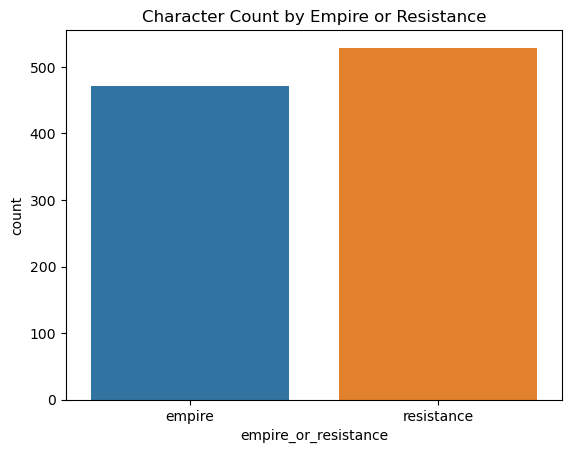

In [117]:
sns.barplot(empire_v_resistance, x="empire_or_resistance", y="count").set_title('Character Count by Empire or Resistance')

In [94]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# sk.DecisionTreeClassifier 
X = df[['homeworld','unit_type']]
X_encoded = pd.get_dummies(X)
y = df['is_resistance'].to_frame()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=24)

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[ True False False False False False False False  True False  True False
 False False  True  True False  True False  True False  True  True False
 False  True False False False  True False  True  True  True  True False
  True  True False False  True  True  True False  True False False False
 False False  True  True False False  True  True False False False  True
  True False  True False False False  True False  True  True False False
 False  True False False False False False False  True  True False  True
 False False False False False False  True  True  True False  True False
 False  True  True False  True  True  True False False  True  True  True
 False  True False False  True  True False  True  True False False  True
 False False  True  True False  True  True False False  True False False
 False  True  True False  True  True False  True False False  True False
  True  True False  True False False False  True False  True  True  True
  True  True  True False False  True False  True Fa

<Axes: xlabel='Feature', ylabel='Importance'>

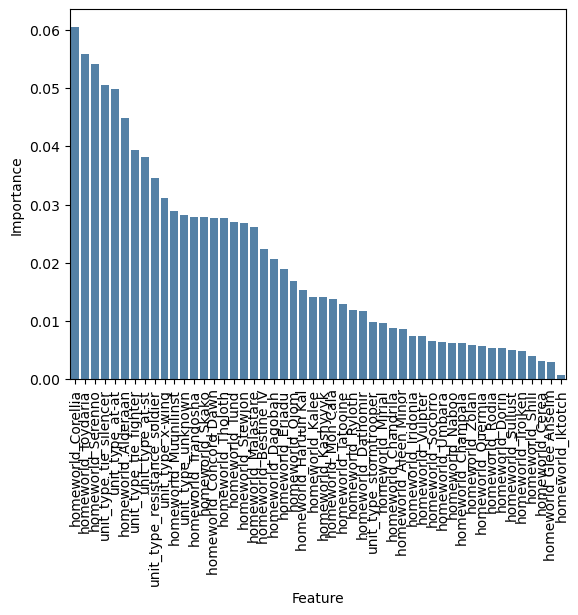

In [116]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
feature_importances = sns.barplot(data=feature_importances, x="Feature", y="Importance", color="steelblue", order=feature_importances.sort_values('Importance',ascending = False).Feature).set_title('Character Count by Empire or Resistance')
x_ticks = my_plot.get_xticklabels()
feature_importances.set_xticklabels(x_ticks, rotation=90)
feature_importances